In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

In [5]:
inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/HDF_Results/'

outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/' + 'PostAnalys'
outDir = create_fullpath(  outDir )



Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/PostAnalys  already exists


In [10]:
ls_dir( inDir )

array(['run_gui', '_HB_Cell_1.h5', '_HB_Cell_2.h5', '_HB_Cell_3.h5'],
      dtype='<U13')

In [11]:
sams = ['_HB_Cell_1.h5', '_HB_Cell_2.h5', '_HB_Cell_3.h5']
sam = sams[0]

In [31]:
def _get_saxs():
    qiq_dict = {}
    for sam in sams:
        Res = h5todict( inDir + sam  )['SAXS']
        fps = Res['md']['filenames']
        fp = fps[0]
        print( fp )
        qiq_dict[ sam ] =Res[fp]['cir_avg']['data']
    return qiq_dict    
        
def _get_waxs():
    qiq_dict = {}
    for sam in sams:
        Res = h5todict( inDir + sam  )['WAXS']
        #fps = Res['md']['filenames']
        #fp = fps[0]
        #print( fp )
        qiq_dict[ sam ] =Res['cir_avg']['data']   
    return qiq_dict        

In [34]:
qiqs = _get_saxs()
qiqw = _get_waxs()

_HB_Cell_1_x29888.54_y-4640.22_waxsP65.00_expt5s_attNone_sid00136858_000001_SAXS.tif
_HB_Cell_2_x8988.91_y-4440.11_waxsP65.00_expt5s_attNone_sid00136859_000001_SAXS.tif
_HB_Cell_3_x-12411.39_y-5939.8_waxsP65.00_expt5s_attNone_sid00136860_000001_SAXS.tif


In [38]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/users_temp.py

## Plot WAXS together

<IPython.core.display.Javascript object>


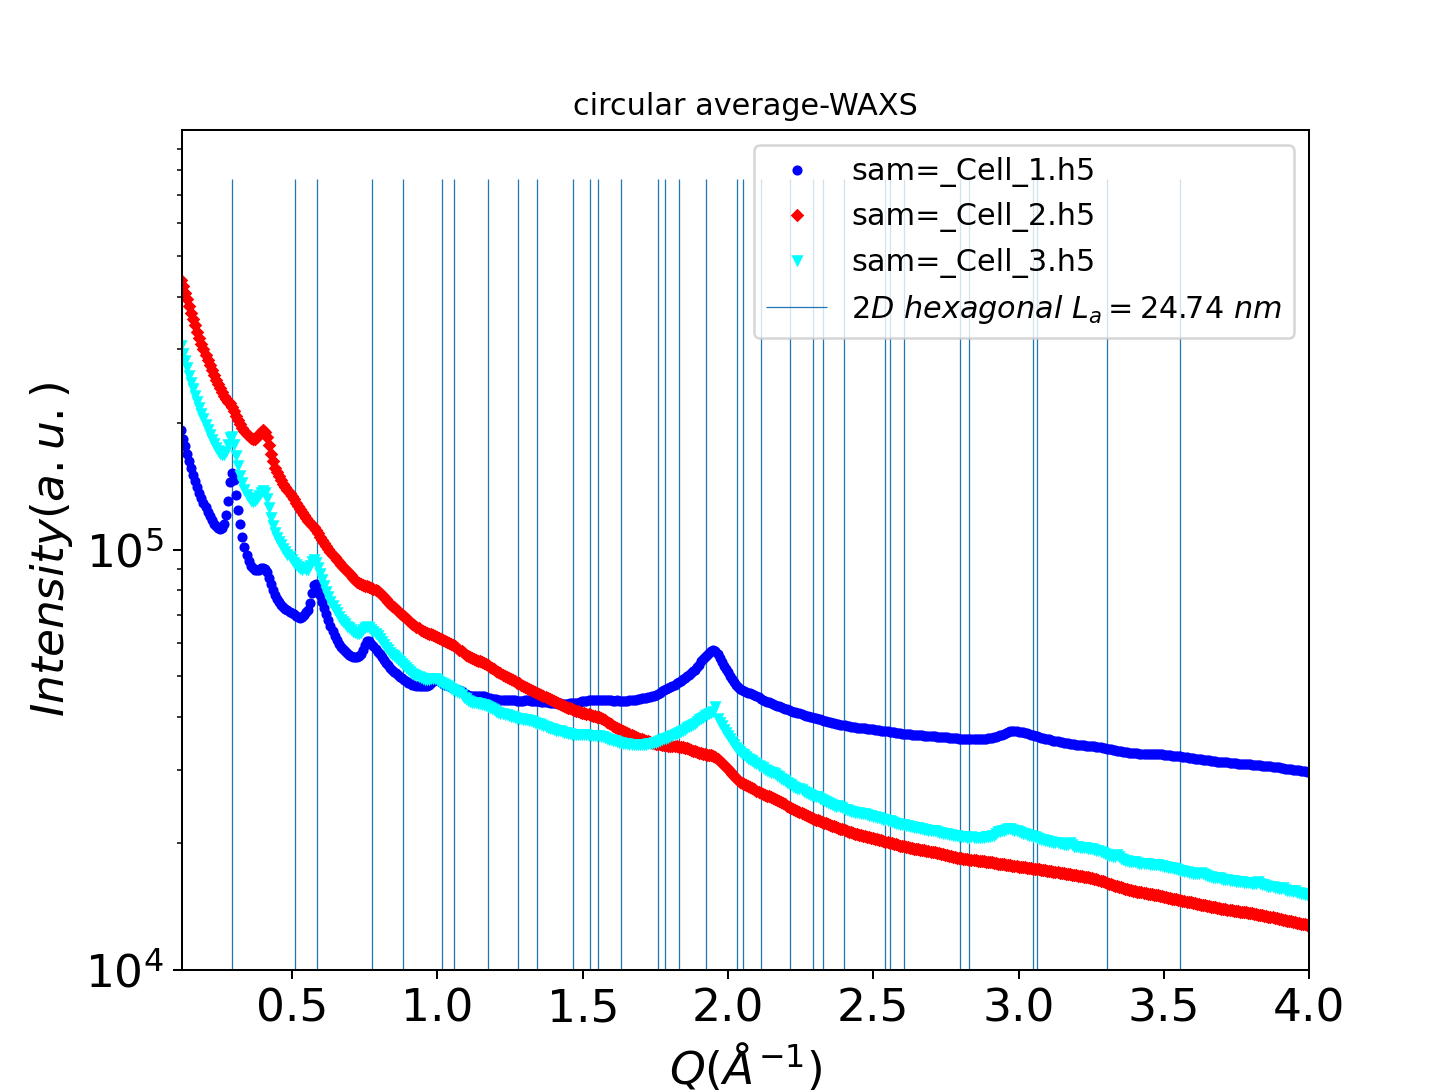

0.2933069692547221 3.5561580107425486 24.735850891548726
0.20166965496972322 2.4451146212671215 35.9756526485162
0.20166965496972322 2.4451146212671215 35.9756526485162


/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


Text(0.5, 0, '$Q (\\AA^{-1})$')

In [51]:
fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  ) 

i=0
for sam in ['_HB_Cell_1.h5', '_HB_Cell_2.h5', '_HB_Cell_3.h5']:
    ca = qiqw[sam]
    q, iq = ca[:,0], ca[:,1]  

    ax = axes[0]   
    plot1D( x= q, y= iq  , m= markers[i], ls='', ax=ax, c=colors[i], markersize=3,
        logy=True, logx= False, 
        title='circular average-WAXS', 
       legend='sam=%s'%sam[3:], fontsize=16, tick_size =18, 
       xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
    
    xm,ym =  find_max_peak( q, iq , xrange=[0.2, 0.4 ])
    La = get_La( xm )
    qs = get_2dhx_qs( m = 8, a = La )
    print(qs[0], qs[-1], La)
    
    ax.set_xlim([0.12, 4 ])   
    ax.set_ylim([  1e4, ym*5.0])
    if i ==0:
        ax.vlines( qs, 0, ym*5 , label=r'$2D\ hexagonal\ L_a=%.2f\ nm$'%(La), 
                  linestyle='-' , linewidth=.5  )
  
    
    
    i += 1
ax.legend(loc = 'best', fontsize= 12 )
ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)
    

# Plot SAXS together

<IPython.core.display.Javascript object>


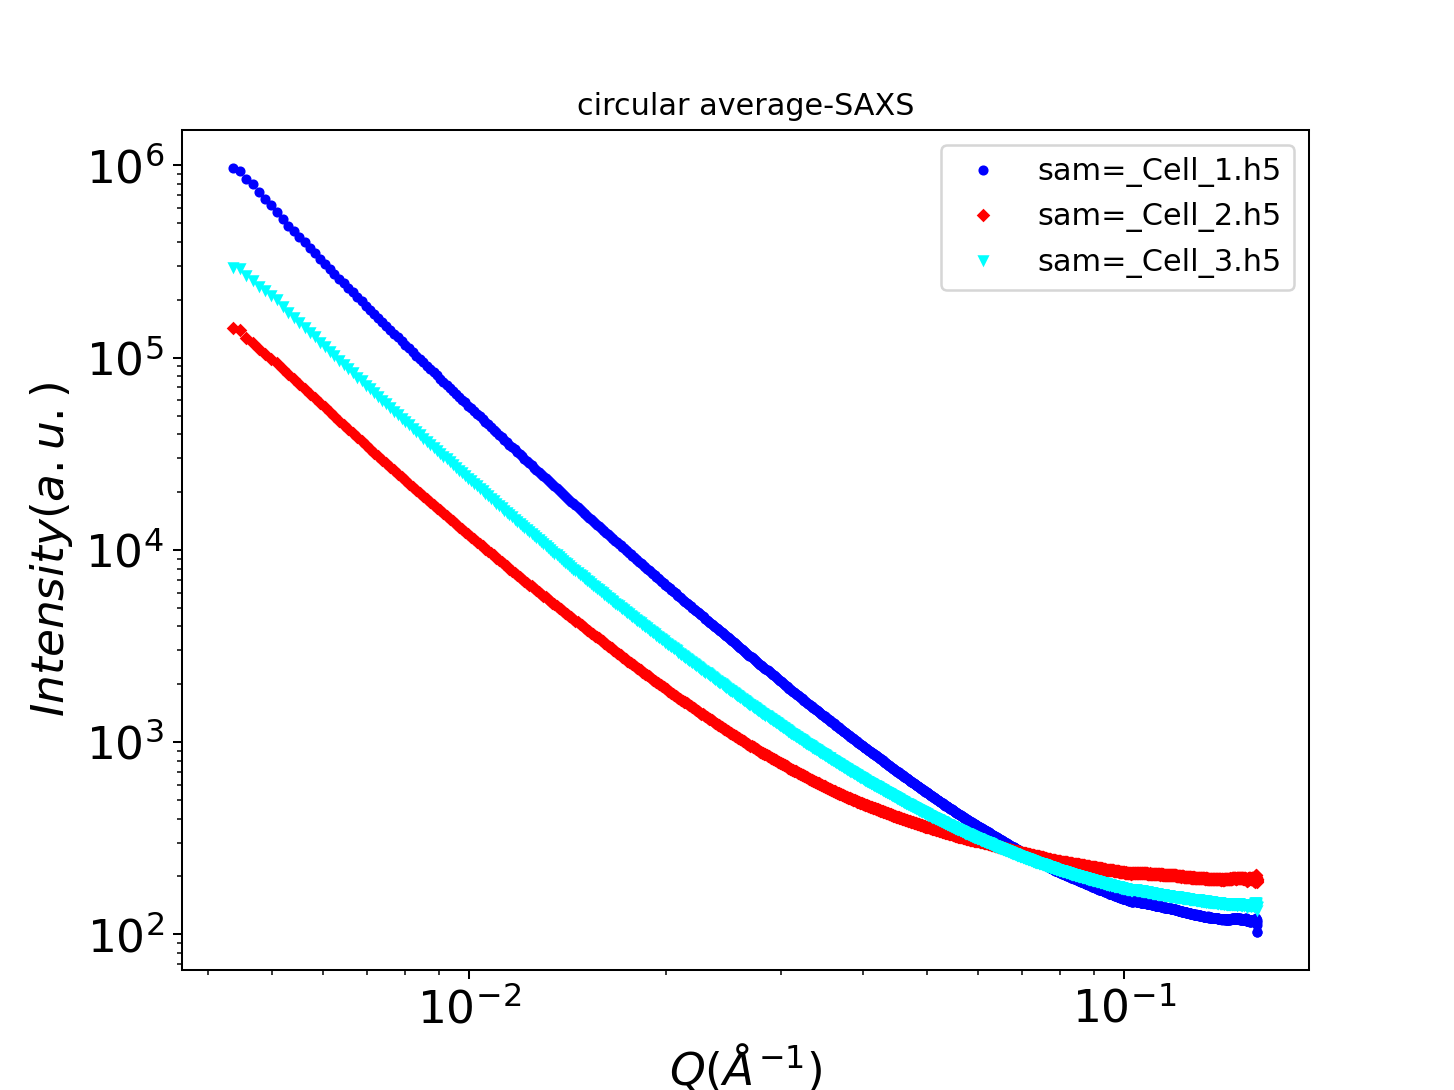

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


Text(0.5, 0, '$Q (\\AA^{-1})$')

In [56]:
fig,axes=create_fig_ax( H=1,V=1, figsize=[8,6], title='',fontsize=12, y=1.08  ) 

i=0
for sam in ['_HB_Cell_1.h5', '_HB_Cell_2.h5', '_HB_Cell_3.h5']:
    ca = qiqs[sam]
    q, iq = ca[:,0], ca[:,1]  

    ax = axes[0]   
    plot1D( x= q, y= iq  , m= markers[i], ls='', ax=ax, c=colors[i], markersize=3,
        logy=True, logx= True, 
        title='circular average-SAXS', 
       legend='sam=%s'%sam[3:], fontsize=16, tick_size =18, 
       xlabel=r'$Q (\AA^{-1})$', ylabel= r'$Intensity (a.u.)$', )
 
    
    #ax.set_xlim([0.12, 4 ])   
    #ax.set_ylim([  1e4, ym*5.0])    
    i += 1
ax.legend(loc = 'best', fontsize= 12 )
ax.set_ylabel( r'$Intensity (a.u.)$', fontsize=18)
ax.set_xlabel( r'$Q (\AA^{-1})$', fontsize=18)
    